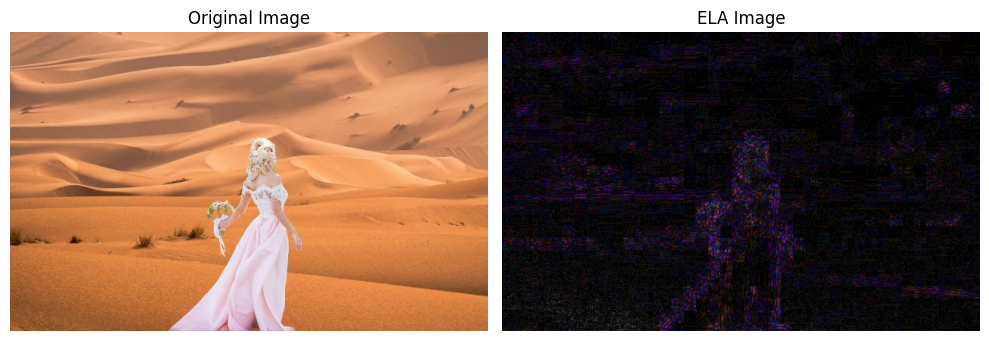

In [6]:
from PIL import Image, ImageChops, ImageEnhance
import matplotlib.pyplot as plt
import os

def ela(image_path, quality=90):
    original_image = Image.open(image_path)
    temp_image_path = "temp_image.jpg"
    original_image.save(temp_image_path, "JPEG", quality=quality)
    temp_image = Image.open(temp_image_path).convert("RGB")
    ela_image = ImageChops.difference(original_image, temp_image)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)  
    ela_image_path = "ela_image.jpg"
    ela_image.save(ela_image_path)
    os.remove(temp_image_path)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    axes[1].imshow(ela_image)
    axes[1].set_title("ELA Image")
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()
    return ela_image_path
image_path ="bgaltered.jpg"
ela_image_path = ela(image_path)
